In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


In [6]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/GenAl/csv/driver-data.csv")
df.head(5)


,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [10]:
scaler = MinMaxScaler()
scaler.fit(df[['mean_dist_day']])
df['mean_dist_day'] = scaler.transform(df[['mean_dist_day']])
scaler.fit(df[['mean_over_speed_perc']])
df['mean_over_speed_perc'] = scaler.transform(df[['mean_over_speed_perc']])


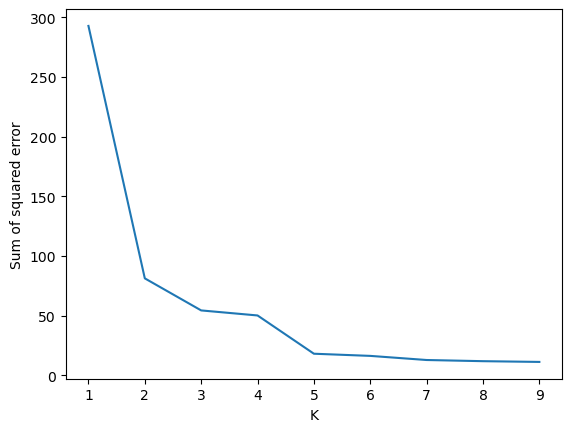

In [12]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df[['mean_over_speed_perc', 'mean_dist_day']])
    sse.append(km.inertia_)

plt.clf()
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1, 10), sse)
plt.show()

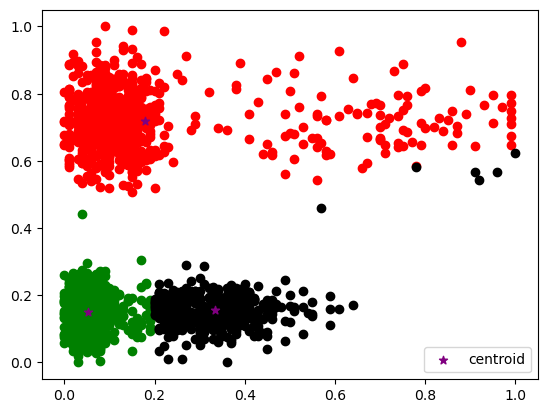

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mean_over_speed_perc', 'mean_dist_day']])
df['cluster'] = y_predicted

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.mean_over_speed_perc, df1['mean_dist_day'], color='green')
plt.scatter(df2.mean_over_speed_perc, df2['mean_dist_day'], color='red')
plt.scatter(df3.mean_over_speed_perc, df3['mean_dist_day'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.legend()
plt.show()
